In [82]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [83]:
mnist = datasets.load_digits()

In [84]:
print(mnist.data.shape)
print(mnist.target)
print(mnist.target_names)

(1797, 64)
[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


In [85]:
trainData, testData, trainLabel, testLabel = train_test_split(np.array(mnist.data), mnist.target, 
                                                              test_size=0.2, random_state = 13)

In [86]:
model = KNeighborsClassifier(n_neighbors = 15, weights='uniform')
model.fit(trainData, trainLabel)

y_pred = model.predict(testData)
y_test = testLabel


In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

print('test accuracy: {}'.format(accuracy_score(y_test,y_pred))) # test accuracy
print('test precision: {}'.format(precision_score(y_test,y_pred, average='micro'))) # test precision
print('test recall: {}'.format(recall_score(y_test,y_pred, average='micro'))) # test recall
print('test f1_measure: {}'.format(f1_score(y_test,y_pred, average='micro')))


# 앞에서 사용했던 numpy로 계산을 했던 식으로 prediction, recall, f1_measure 로 계산을 하면 
# 오류가 발생한다, 그 이유는 무엇일까 ? 
print(classification_report(y_test,y_pred))


test accuracy: 0.9805555555555555
test precision: 0.9805555555555555
test recall: 0.9805555555555555
test f1_measure: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.90      1.00      0.95        37
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        38
           5       1.00      0.98      0.99        45
           6       1.00      1.00      1.00        42
           7       1.00      0.96      0.98        26
           8       0.97      0.88      0.92        34
           9       0.94      1.00      0.97        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



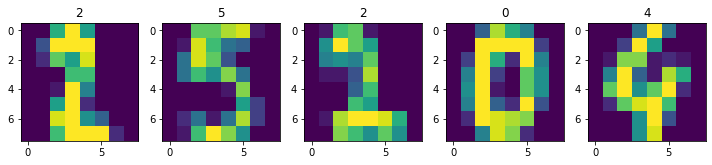

In [81]:
import matplotlib.pyplot as plt
images = np.zeros((5,8,8))
results = []
for i in range(5):
    image = testData[np.random.randint(0,high=len(testLabel))]
    images[i] = image.reshape((8,8))
    pred = model.predict(image.reshape((1,-1)))
    results.append(pred.astype(int))

_, ax = plt.subplots(1,5, figsize=(10,5))

i = 0
for axi, image in zip(ax.flat, images):
    axi.set_title(results[i][0])
    i += 1
    axi.imshow(image)
    #axi.imshow(image)
    
plt.tight_layout()